In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [9]:
dfx = pd.read_csv("weighted_X.csv")
dfy =pd.read_csv("weighted_Y.csv")
X = dfx.values 
Y = dfy.values


In [12]:
print(X.shape)
print(Y.shape)

plt.style.use("seaborn")

(99, 1)
(99, 1)


No handles with labels found to put in legend.


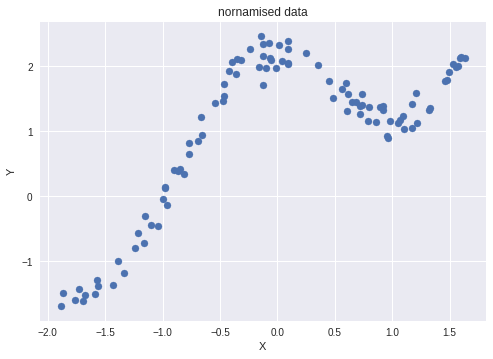

In [21]:
#normalise 
X=(X-X.mean())/X.std()

plt.title("nornamised data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.scatter(X,Y)
plt.show()

In [34]:
def getW(querrypoint ,X , tau):
    m =X.shape[0]
    W = np.mat(np.eye(m))
    
    
    for i in range (m):
        xi =X[i]
        x =querrypoint
        W[i,i] = np.exp(np.dot((xi-x),(xi -x).T)/(-2*tau*tau))
        
        
    return W
    

In [61]:
X = np.mat(X)
Y =np.mat(Y)
M=X.shape[0]

W = getW(-1  ,X ,.5)
print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


# make prediction 

In [62]:
def predict(X,Y ,querry_x ,tau):
    ones =np.ones((M,1))
    X_ =np.hstack((X,ones))
    ## you have  stacked 1 to x so querry will also be stacked by 1  
    qx=np.mat([querry_x , 1])
    W = getW(qx,X_ ,tau)
    theta = np.linalg.pinv(X_.T *(W * X_))*(X_.T * (W * Y) )
    pred = np.dot(qx ,theta)
    return pred,theta 


In [63]:
 pred , theta=  predict(X,Y , 1.0,1)

In [68]:
print(pred)


[[1.59417694]]


# visualise predicton with tau

In [79]:
def plotpredict(tau):
    X_test = np.linspace(-2 ,2,20)
    Y_test =[]
    
    for qp in X_test:
        pred,theta=  predict(X,Y , qp ,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    XO = np.array(X)
    YO =np.array(Y)
    plt.title("Tau / bandwidth  param %.2f "%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test, color ='red')
    plt.show()

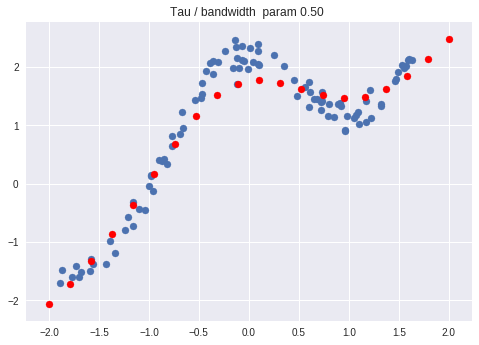

In [80]:
plotpredict(.5)

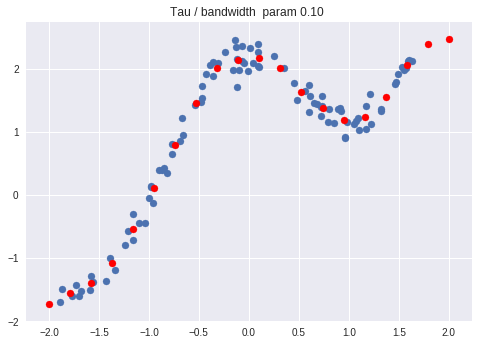

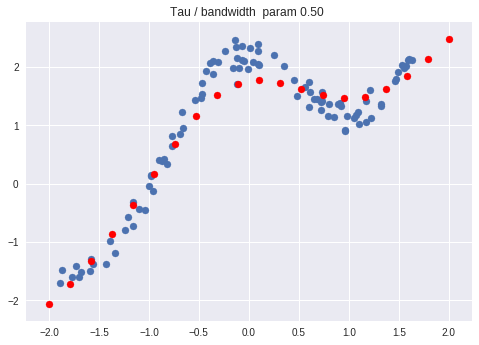

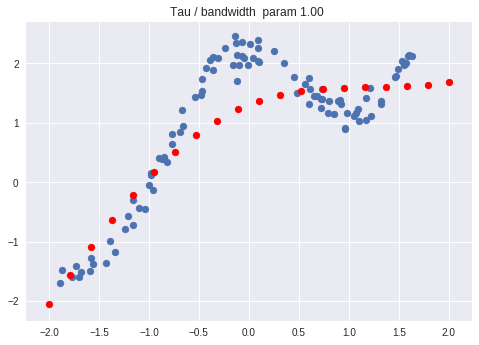

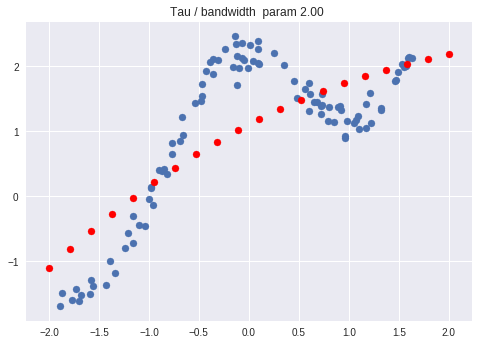

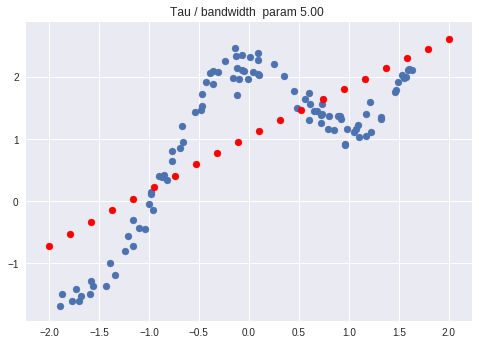

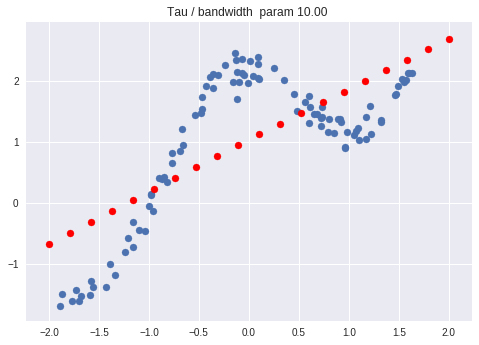

In [82]:
taus=[.1,0.5,1,2,5,10]

for tau in taus:
    plotpredict(tau)
